In [9]:
import numpy as np
from tensorflow import keras
from tensorflow.keras import layers
import matplotlib.pyplot as plt 
import seaborn as sns

In [14]:
sns.set(context='talk', style='white', rc={'figure.facecolor':'white'}, font_scale=1)
sns.set_style('ticks')

# data

In [70]:
# load the data in from the keras default package 
(x_train, y_train), (x_test, y_test) = keras.datasets.mnist.load_data()

In [71]:
x_train.shape, y_train.shape

((60000, 28, 28), (60000,))

In [72]:
x_train[-1, :, :]

array([[  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  

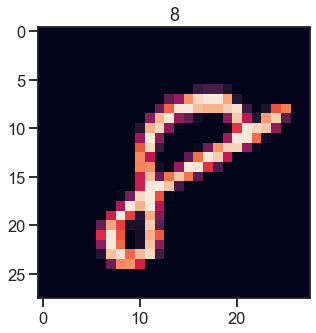

In [73]:
plt.figure(figsize = (5,5))
plt.imshow(x_train[-1, :, :])
plt.title(y_train[-1])
plt.show()

# process images 

In [44]:
# Scale images to the [0, 1] range
x_train = x_train.astype("float32")/255
x_test = x_test.astype("float32")/255

In [45]:
x_train = np.expand_dims(x_train, -1)
x_test = np.expand_dims(x_test, -1)

In [46]:
x_test.shape, x_train.shape

((10000, 28, 28, 1), (60000, 28, 28, 1))

### make categorical 

In [47]:
y_test.shape, y_train.shape

((10000,), (60000,))

In [48]:
y_train = keras.utils.to_categorical(y_train, len(np.unique(y_train)))
y_test = keras.utils.to_categorical(y_test, len(np.unique(y_test)))

In [49]:
y_test.shape, y_train.shape

((10000, 10), (60000, 10))

# define model

In [61]:
input_shape = x_train.shape[1:]
num_classes = y_train.shape[1]

In [62]:
model = keras.Sequential(
    [
        keras.Input(shape=input_shape),
        layers.Conv2D(32, kernel_size=(3, 3), activation="relu"),
        layers.MaxPooling2D(pool_size=(2, 2)),
        layers.Conv2D(64, kernel_size=(3, 3), activation="relu"),
        layers.MaxPooling2D(pool_size=(2, 2)),
        layers.Flatten(),
        layers.Dropout(0.5),
        layers.Dense(num_classes, activation="softmax"),
    ]
)

model.summary()

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_6 (Conv2D)            (None, 26, 26, 32)        320       
_________________________________________________________________
max_pooling2d_6 (MaxPooling2 (None, 13, 13, 32)        0         
_________________________________________________________________
conv2d_7 (Conv2D)            (None, 11, 11, 64)        18496     
_________________________________________________________________
max_pooling2d_7 (MaxPooling2 (None, 5, 5, 64)          0         
_________________________________________________________________
flatten_3 (Flatten)          (None, 1600)              0         
_________________________________________________________________
dropout_3 (Dropout)          (None, 1600)              0         
_________________________________________________________________
dense_2 (Dense)              (None, 10)               

In [63]:
model.compile(loss="categorical_crossentropy", optimizer="adam", metrics=["accuracy"])

In [65]:
history = model.fit(x_train, y_train, batch_size=128, epochs=5, validation_split=0.1)

Epoch 1/5
422/422 [==============================] - 29s 68ms/step - loss: 0.0562 - accuracy: 0.9823 - val_loss: 0.0397 - val_accuracy: 0.9890
Epoch 2/5
422/422 [==============================] - 32s 77ms/step - loss: 0.0509 - accuracy: 0.9841 - val_loss: 0.0368 - val_accuracy: 0.9907
Epoch 3/5
422/422 [==============================] - 30s 71ms/step - loss: 0.0486 - accuracy: 0.9844 - val_loss: 0.0346 - val_accuracy: 0.9907
Epoch 4/5
422/422 [==============================] - 32s 77ms/step - loss: 0.0448 - accuracy: 0.9857 - val_loss: 0.0340 - val_accuracy: 0.9910
Epoch 5/5
422/422 [==============================] - 30s 71ms/step - loss: 0.0436 - accuracy: 0.9863 - val_loss: 0.0322 - val_accuracy: 0.9922


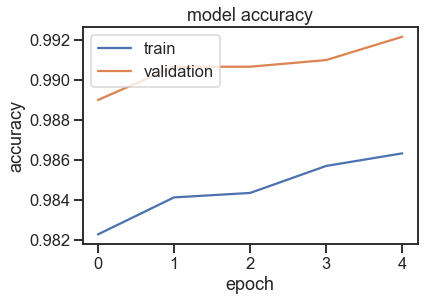

In [66]:
plt.plot(history.history["accuracy"], label="train")
plt.plot(history.history["val_accuracy"], label="validation")
plt.title("model accuracy")
plt.ylabel("accuracy")
plt.xlabel("epoch")
plt.legend(["train", "validation"], loc='upper left')
plt.show()

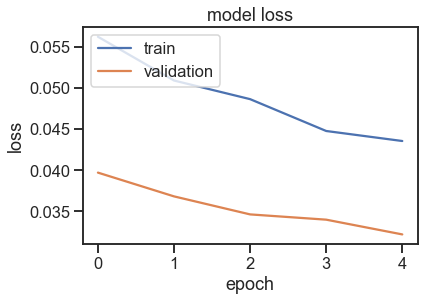

In [67]:
plt.plot(history.history["loss"])
plt.plot(history.history["val_loss"])
plt.title("model loss")
plt.ylabel("loss")
plt.xlabel("epoch")
plt.legend(["train", "validation"], loc='upper left')
plt.show()

# evaluate 

In [69]:
model.evaluate(x_test, y_test, verbose=0)

[0.025639608502388, 0.991100013256073]